In [1]:
# DIRECTORY SET
import os
import sys
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [2]:
%load_ext autoreload
%autoreload 2

from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils

In [3]:
video_id="75Btb7bWpqw"

Number of chunks:  198
Cost:  0.007608
Cost:  0.0021964999999999997
Cost:  0.00230075
Cost:  0.0024275
Cost:  0.00251575
Cost:  0.0024827499999999997
Cost:  0.0027592500000000004
Cost:  0.00265025
Cost:  0.0029897500000000002
Cost:  0.0027185
Cost:  0.0027287500000000003
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  18
Segment 0: Supreme Court Decision on Chevron Deference, 148
Segment 1: Supreme Court Decision on Chevron Deference, 52
Segment 2: Supreme Court Decision on Chevron Deference, 54
Segment 3: EPA Authorization and Regulations, 57
Segment 4: EPA Authorization and Regulations, 60
Segment 5: EPA Authorization and Regulations, 56
Segment 6: EPA Authorization and Regulations, 88
Segment 7: non categorized, 62
Segment 8: non categorized, 81
Segment 9: non categorized, 96
Segment 10: non categorized, 87
Segment 11: Economic Discussions, 65
Segment 12: Economic Discussions, 82
Segment 13: Economic Disc

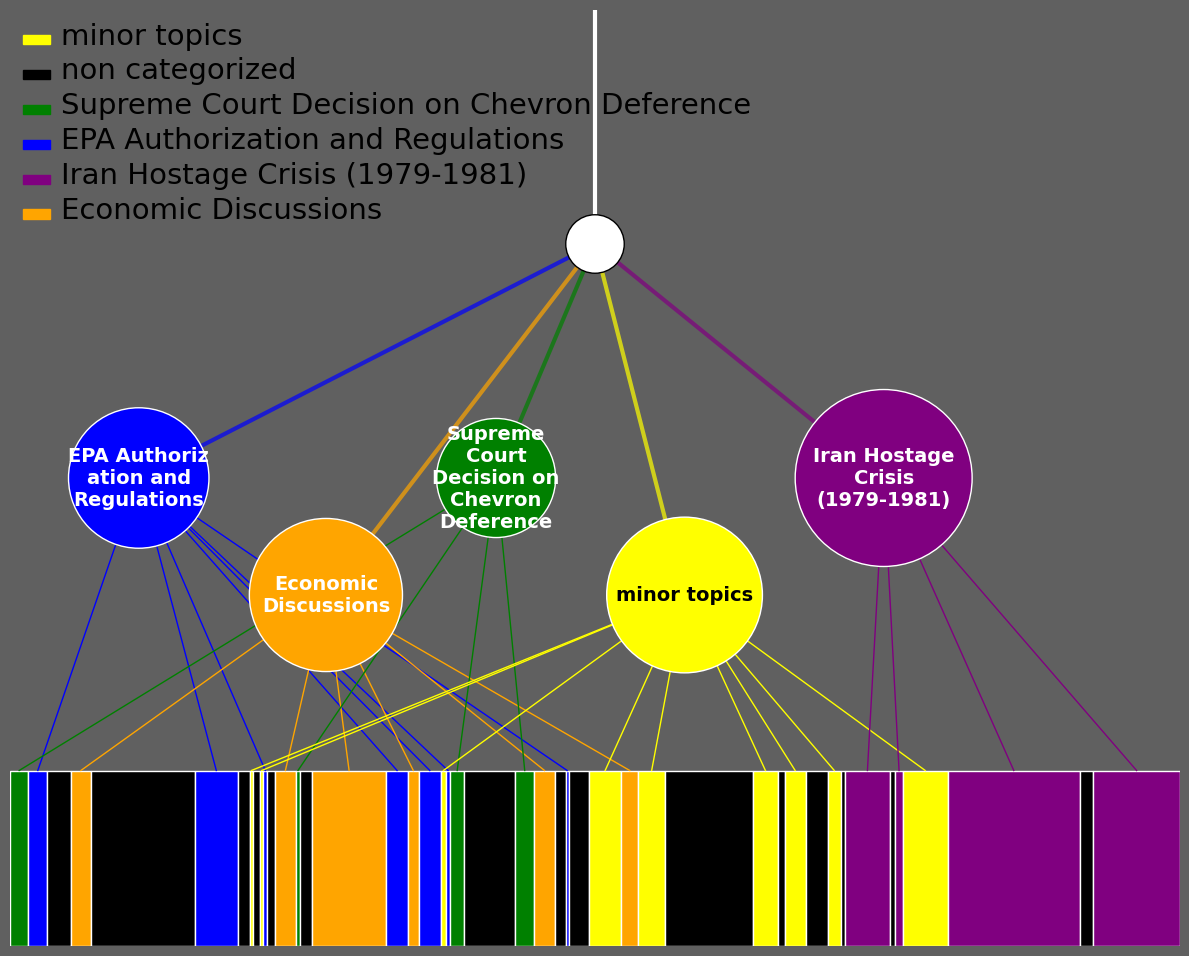

In [22]:
await services.visualization.full_process(video_id)

In [ ]:
stream_recap_data=await utils.get_recap_data(video_id)

text_chunks_no_overlap = await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

chunk_batches = await services.visualization.generate_text_chunk_batches(text_chunks_no_overlap)

topic_annotations_str = await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

major_topics, minor_topics = services.visualization.process_topic_annotations_str(topic_annotations_str)

responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

segments, category_locations, color_dict = await services.visualization.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics)

clickable_areas=await services.visualization.create_and_save_plot(video_id, segments, category_locations, color_dict)

clickable_areas, base64_plot_image = services.visualization.clickable_and_plot_image_finalization(video_id, clickable_areas)

stream_recap_data.plot_clickable_area_data=clickable_areas

In [4]:
stream_recap_data=await utils.get_recap_data(video_id)

In [5]:
text_chunks_no_overlap = await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

Number of chunks:  198


In [6]:
chunk_batches = await services.visualization.generate_text_chunk_batches(text_chunks_no_overlap)

In [7]:
topic_annotations_str = await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

Cost:  0.007608


In [8]:
major_topics, minor_topics = services.visualization.process_topic_annotations_str(topic_annotations_str)

In [9]:
responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

Cost:  0.002128
Cost:  0.0021964999999999997
Cost:  0.0024275
Cost:  0.00251575
Cost:  0.002881
Cost:  0.0027185
Cost:  0.00230075
Cost:  0.0027287500000000003
Cost:  0.0024827499999999997
Cost:  0.0026615
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  20
Results:  18


In [10]:
segments, category_locations, color_dict = await services.visualization.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics)

Segment 0: Supreme Court Decision on Chevron Deference, 148
Segment 1: Supreme Court Decision on Chevron Deference, 52
Segment 2: Supreme Court Decision on Chevron Deference, 54
Segment 3: EPA Authorization and Regulations, 57
Segment 4: EPA Authorization and Regulations, 60
Segment 5: EPA Authorization and Regulations, 56
Segment 6: EPA Authorization and Regulations, 88
Segment 7: non categorized, 62
Segment 8: non categorized, 81
Segment 9: non categorized, 96
Segment 10: non categorized, 87
Segment 11: Economic Discussions, 65
Segment 12: Economic Discussions, 82
Segment 13: Economic Discussions, 63
Segment 14: Economic Discussions, 70
Segment 15: non categorized, 59
Segment 16: non categorized, 39
Segment 17: non categorized, 56
Segment 18: non categorized, 72
Segment 19: non categorized, 76
Segment 20: non categorized, 54
Segment 21: non categorized, 64
Segment 22: non categorized, 137
Segment 23: non categorized, 93
Segment 24: non categorized, 82
Segment 25: non categorized, 77


Total width: 9.999999999999998
Circle current x: 2.063259823780388
Circle current x: 3.6741690340614865
Circle current x: 5.1668463617934055
Circle current x: 6.774276066905083
Circle current x: 8.472834292830619


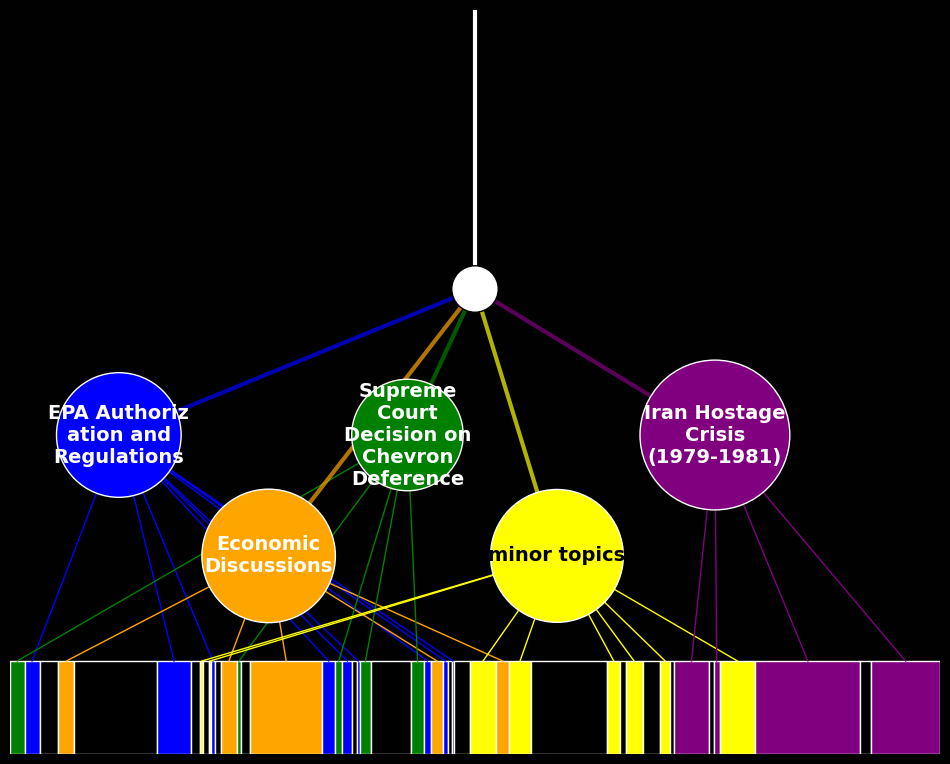

In [25]:
clickable_areas=await services.visualization.create_and_save_plot(video_id, segments, category_locations, color_dict)

In [26]:
clickable_areas, base64_plot_image = services.visualization.clickable_and_plot_image_finalization(video_id, clickable_areas)

1305 1049


In [27]:
stream_recap_data.plot_image=base64_plot_image
stream_recap_data.plot_clickable_area_data=clickable_areas
stream_recap_data.chunk_annotations=annotated_results

await sync_to_async(stream_recap_data.save)()